### seaborn

- matplotlib에 비해 보다 효율적으로, 손쉽게 퀄리티 높게 시각화 수행가능
- https://seaborn.pydata.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass
    

In [5]:
initKoreaFontLoad()

Malgun Gothic


In [7]:
#씨본로드
import seaborn as sns

In [8]:
#뒷배경 
sns.set_style('whitegrid')

In [9]:
#기본 데이터
# tip : 요일별 점심 , 저녁, 흡현 여부 , 식사금액, 팁 금액, 성별, 인원수
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


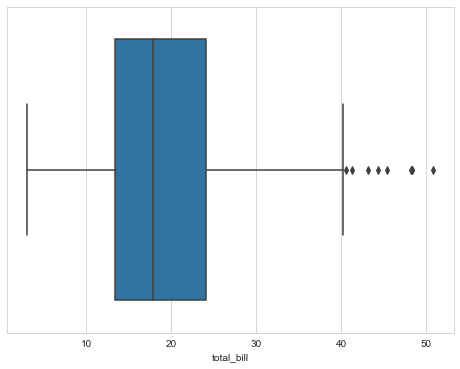

In [10]:
#데이터 표현 
# 가격대가 어디에 몰려 있는지
plt.figure(figsize = (8,6))
sns.boxplot( x=tips['total_bill'])
plt.show()

In [11]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

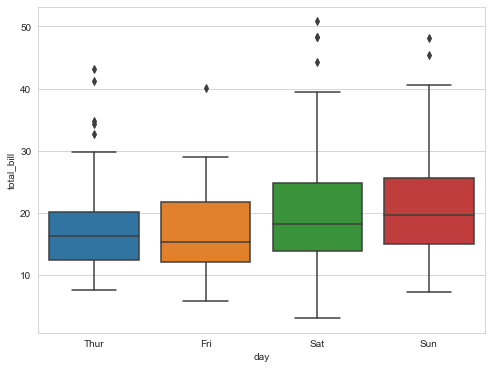

In [13]:
plt.figure(figsize=(8,6))
# x,y축에 대한 컬럼을 지정 , 데이터를 별도로 대입
sns.boxplot(x ='day',y='total_bill', data =tips)
plt.show()

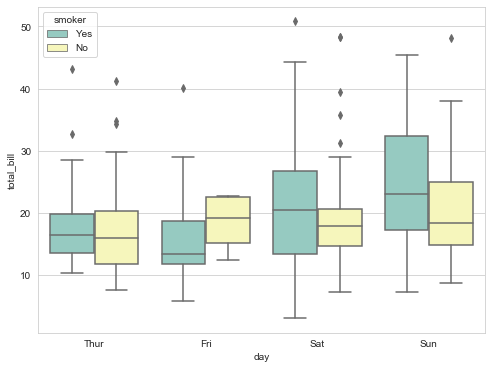

In [14]:
plt.figure( figsize=(8, 6) )
# 위의 시각화 자료에 흡연 여부를 넣겟다
sns.boxplot(x ='day',y='total_bill',hue='smoker', data=tips, palette='Set3')
plt.show()

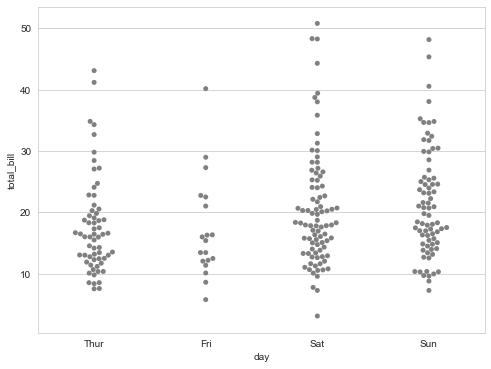

In [15]:
plt.figure( figsize=(8,6) )
# 무리형태로 -> 포인트 중심 시각화 
sns.swarmplot(x='day',y='total_bill', data=tips, color='0.5')
plt.show()

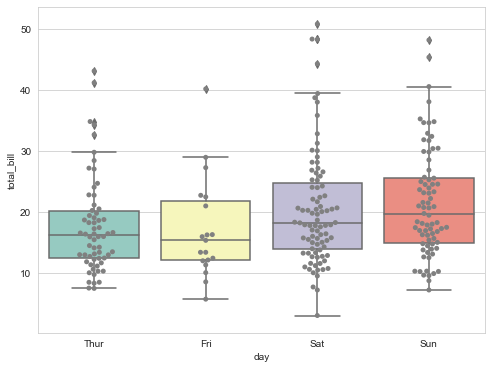

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',data=tips, palette = 'Set3')
sns.swarmplot( x='day', y='total_bill', data=tips, color='0.5' )
plt.show()

### 산포도 + 평균선(x,y에 대한 1차 함수)

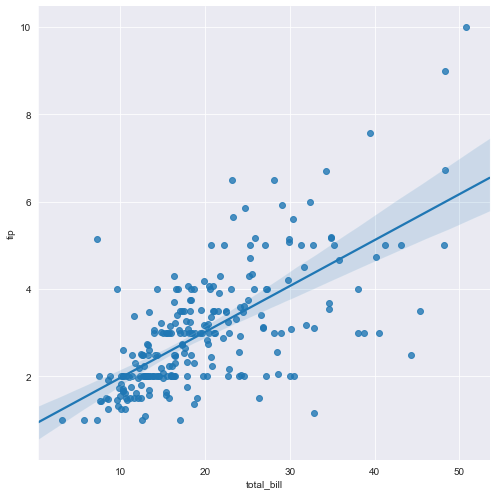

In [19]:
sns.set_style('darkgrid')
sns.lmplot( x='total_bill', y='tip', data = tips, size =7 )
plt.show()

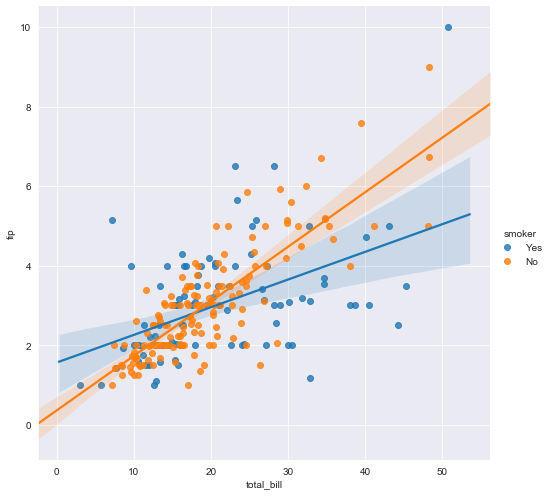

In [20]:
sns.lmplot(x='total_bill', y='tip',hue='smoker', data=tips, size =7 )
plt.show()

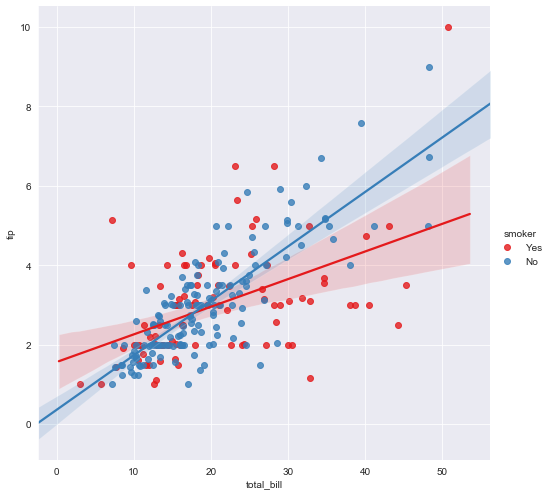

In [21]:
# matplotlib에 비해 코드량이나 작업량이 훨씬 간결하고 파워풀하다
sns.lmplot(x ='total_bill', y='tip', hue='smoker', data=tips , size= 7, palette='Set1')
plt.show()

In [22]:
#더미 데이터 
data = np.random.rand(10,12)
data.shape

(10, 12)

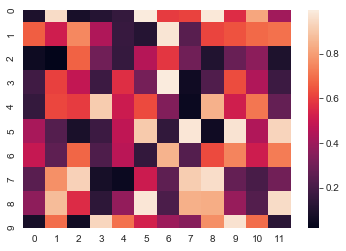

In [23]:
#히트맵
sns.heatmap(data)
plt.show()

In [25]:
flights = sns.load_dataset('flights')
flights.shape

(144, 3)

In [26]:
flights.head(2)

,year,month,passengers
0,1949,January,112
1,1949,February,118


In [28]:
flights['year'].unique(), len(flights['year'].unique())

(array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960], dtype=int64), 12)

In [29]:
flights['month'].unique(), len(flights['month'].unique())

([January, February, March, April, May, ..., August, September, October, November, December]
 Length: 12
 Categories (12, object): [January, February, March, April, ..., September, October, November, December],
 12)

In [31]:
# 인덱스에 12개월, 컬럼에 년도, 데이터는 고객수
flights_piv = flights.pivot('month','year','passengers')
flights_piv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


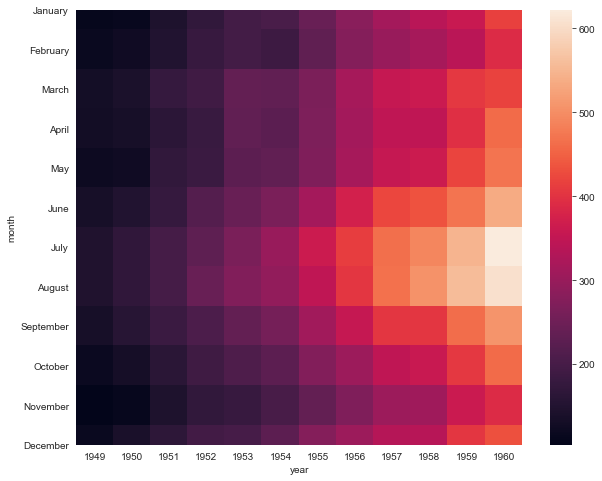

In [36]:
# 히트맵을 통해서 고객수가 어느 방향 (년도, 월)으로 증가하고 있는지, 기세를 확인 
plt.figure( figsize=(10,8) )
sns.heatmap(flights_piv)
plt.show()

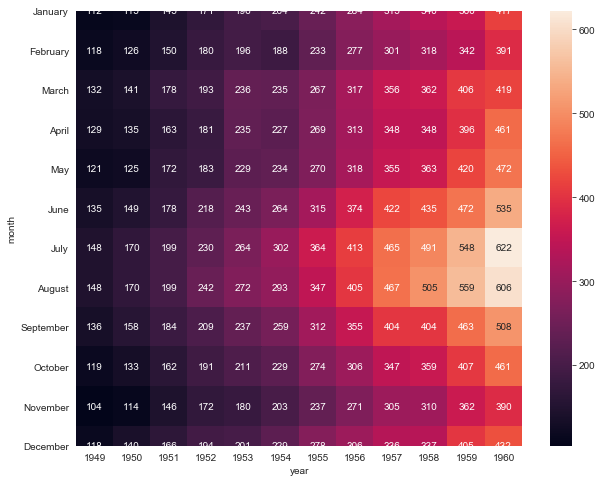

In [35]:
plt.figure (figsize = (10,8))
#데이터 세팅
#annot : 숫자 세팅
#fmt : 수치의 타입, d: 정수
sns.heatmap(flights_piv, annot=True, fmt='d')
plt.show()

In [41]:
# 산포 행렬 
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


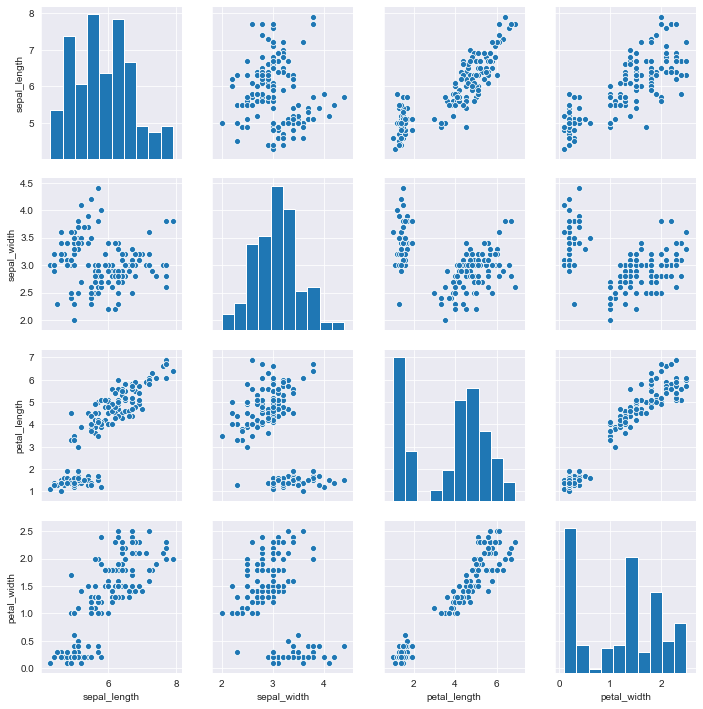

In [38]:
# 대각선 기준으로 대칭으로 확인 
sns.pairplot(iris)
plt.show()

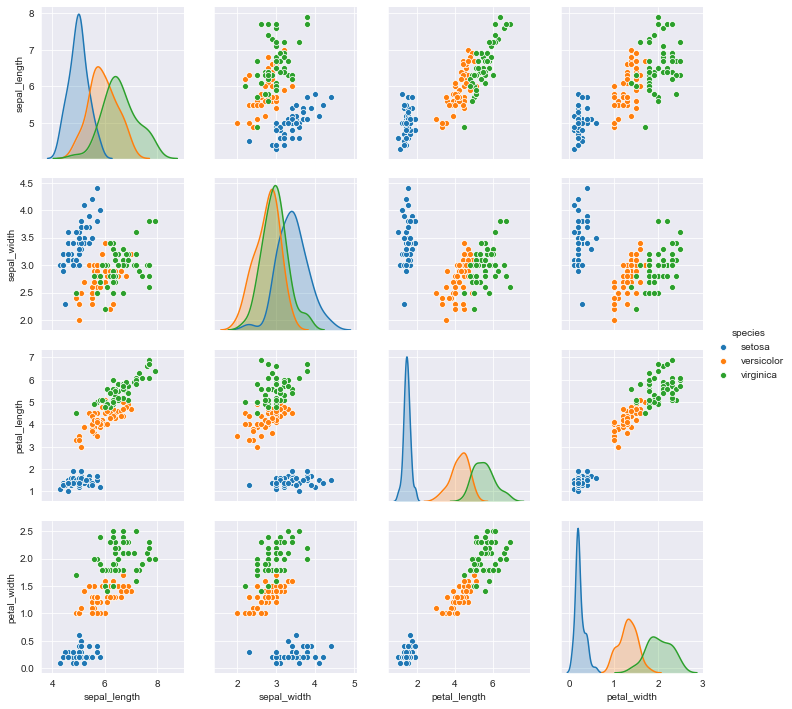

In [39]:
sns.pairplot( iris, hue='species')
plt.show()

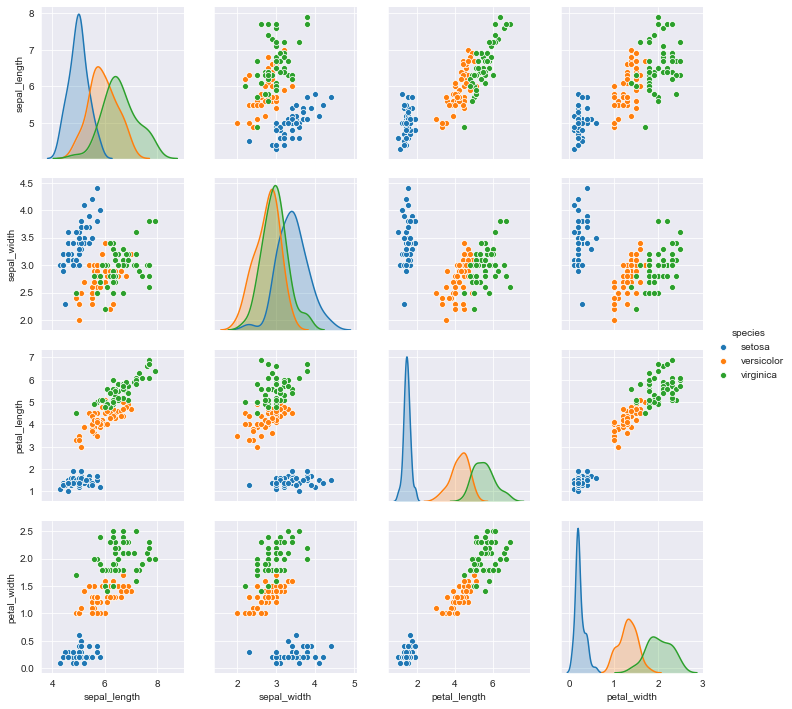

In [40]:
sns.pairplot( iris, hue='species' )
plt.show()

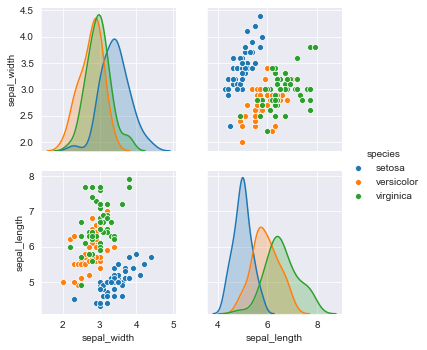

In [42]:
sns.pairplot( iris, hue='species' , vars=['sepal_width', 'sepal_length'])
plt.show()

In [43]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

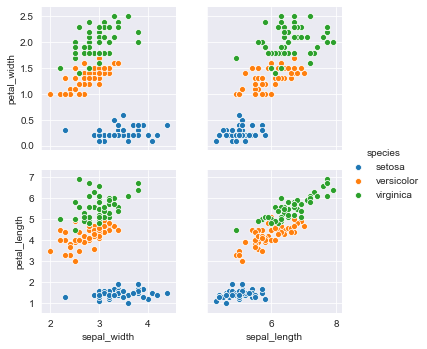

In [45]:
sns.pairplot(iris,hue='species',x_vars=['sepal_width', 'sepal_length']
            ,y_vars=['petal_width', 'petal_length'])
plt.show()